In [6]:
import pandas as pd
import numpy as np
import os
from os.path import dirname, join
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
#stop runtime error
np.seterr(divide='ignore', invalid='ignore')
rcParams['figure.figsize'] = 10, 15
__FILE__ = '/home/kenneth/Documents/GIT_PROJECTS/DATA-MINING-AND-INSGIGHT-EXPLORATION/' 
DATASET_ = join(dirname(__FILE__), 'DATASET')

hosue_df = pd.read_csv(join(DATASET_, 'Villas For Sale.csv'))
#drop na values
hosue_df.dropna(inplace = True)
if 'Create Time' in hosue_df.columns:
  hosue_df.rename(columns = {'Create Time': 'date'}, inplace = True)
  hosue_df.date = pd.to_datetime(hosue_df.date, unit = 's')
  hosue_df.sort_values(by = 'date', inplace = True)
  hosue_df.set_index(['date'], inplace = True)



### Explanation for Skewness and Kurtosis

#### Positive Skewness: means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

#### Negative Skewness: is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

###### Area
###### Price
###### Apartments
###### Living Rooms
###### Street Width
###### Age
###### Pool
###### Furnished
###### Basement and Lift all have positive skew, meaning their average and median values is more than the highest occuring value. so it would be better to remove this mode values to balance the dataset.

##### The soution to balancing the data is removing outliers and that we would consider at later stage of the project

In [18]:
print('See data description: {}'.format(hosue_df.describe()))
print('Skew of data: {}'.format(hosue_df.skew()))
print('Kurt of data: {}'.format(hosue_df.kurt()))


See data description:          District_id       Area m2         Price    With Images  \
count  156485.000000  1.564850e+05  1.564850e+05  156485.000000   
mean      572.999840  1.525738e+05  2.656382e+09       0.870007   
std        97.277814  1.551792e+07  1.403750e+11       0.336297   
min       390.000000  0.000000e+00  1.000000e+00       0.000000   
25%       486.000000  3.150000e+02  9.500000e+05       1.000000   
50%       590.000000  3.900000e+02  1.250000e+06       1.000000   
75%       682.000000  4.650000e+02  1.750000e+06       1.000000   
max       720.000000  2.147480e+09  1.000000e+13       1.000000   

           Bed Rooms     Apartments   Living Rooms             WC  \
count  156485.000000  156485.000000  156485.000000  156485.000000   
mean        4.552117       1.253481       2.074454       4.408339   
std         0.829863       1.304234       1.130427       0.855093   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       0.

###### Data looks unevenly distributed from the histogram. A mix of positive and negativly skewed features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a5dea1d68>,
      dtype=object)

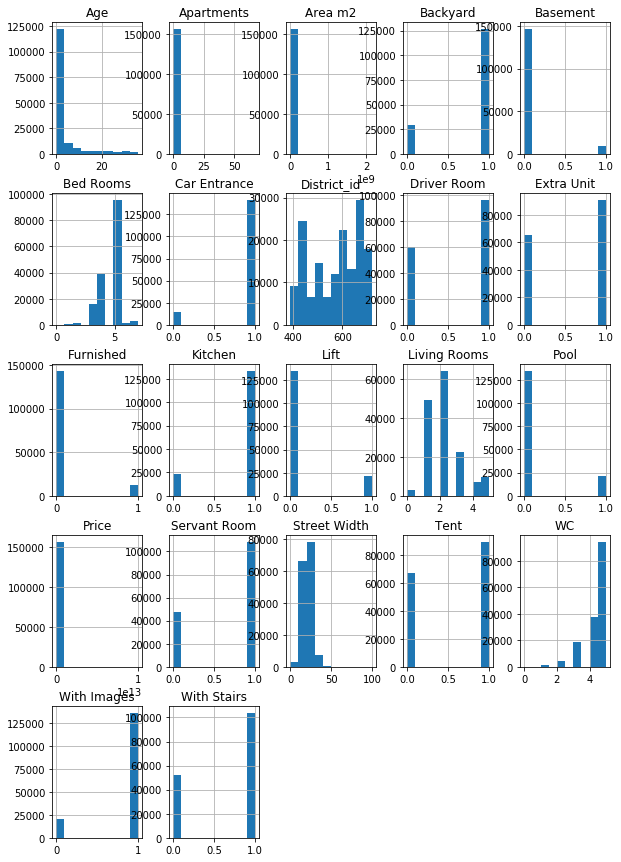

In [7]:
hosue_df.hist()

In [8]:
def standardize_houseprize(df, standardize = None, 
                           logg = None, normalize = None):
  df = df.copy(deep = True)
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in df.columns:
    if df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

df = standardize_houseprize(hosue_df)
df_standard = standardize_houseprize(hosue_df, standardize = True)
log_data = standardize_houseprize(hosue_df, logg=True)
df_normal = standardize_houseprize(hosue_df, normalize = True)

0 District_id
1 Area m2
2 Price
3 With Images
4 Bed Rooms
5 Apartments
6 Living Rooms
7 WC
8 Street Width
9 With Stairs
10 Age
11 Driver Room
12 Servant Room
13 Pool
14 Furnished
15 Tent
16 Backyard
17 Kitchen
18 Extra Unit
19 Car Entrance
20 Basement
21 Lift


#### Quite a few amount of data we should consider as outliers here. The red line is a boundary to better understand the huge deviation here.

Text(0.5, 1.0, 'Plot of count against price on a log scale')

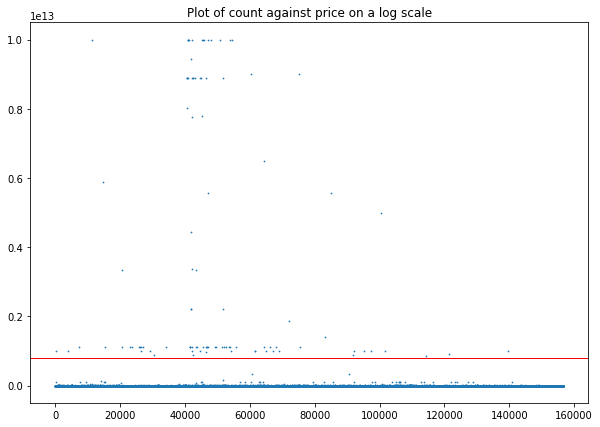

In [17]:
rcParams['figure.figsize'] = 10, 7
plt.scatter(np.arange(hosue_df.shape[0]), hosue_df.Price, s = .5)
plt.axhline(y = .08e13, linewidth=1, color='r')
plt.title('Plot of count against price on a log scale')

##### From the log_data it is evident we have outliers below and certain percentile and above a certain percentile

Text(0.5, 1.0, 'Plot of count against price on a log scale')

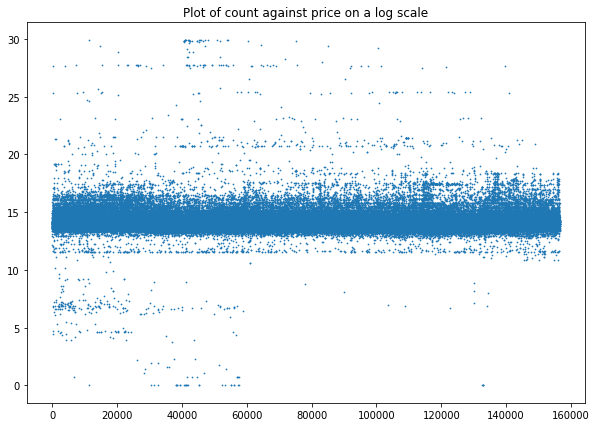

In [20]:
rcParams['figure.figsize'] = 10, 7
plt.scatter(np.arange(log_data.shape[0]), log_data.Price, s = .5)
plt.title('Plot of count against price on a log scale')

#### Even more clearly with a box plot, we can see the price outliers very clearly. Price and Area do share a huge amount of those outliers even for a log data

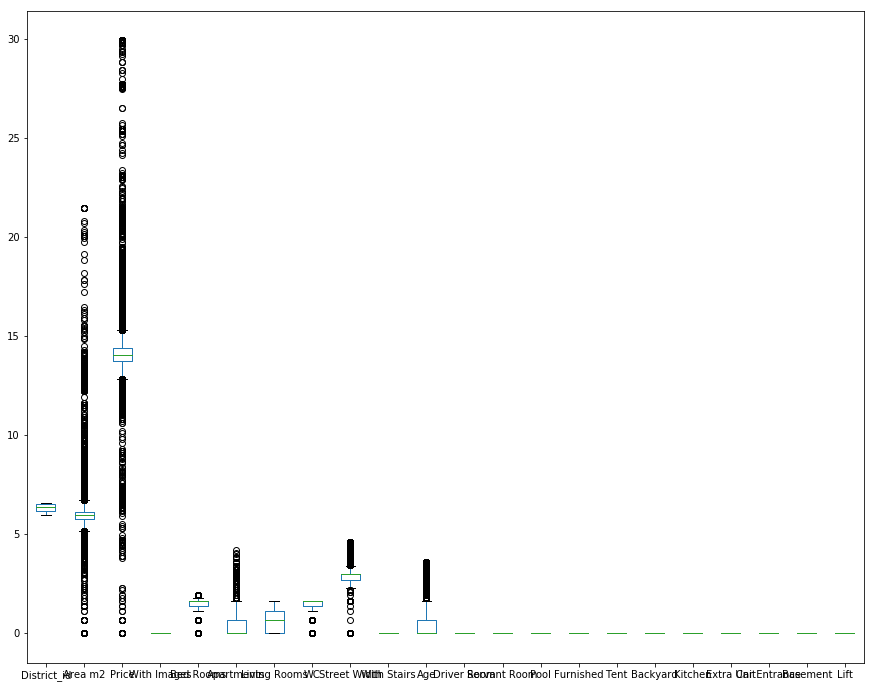

In [22]:
rcParams['figure.figsize'] = 15, 12
log_data.plot(kind='box')